In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
### Import the created function
from src.utils import merge_metadata_data

In [2]:
path_metadata = "/mnt/d/desktop/COPERNICUS/Classes/3-semester/ml/species/output/train_metadata.parquet"
path_data = "/mnt/d/desktop/COPERNICUS/Classes/3-semester/ml/species/output/train_join.parquet"

## Create the whole df
df = merge_metadata_data(path_metadata,path_data)

## drop non necessary columns 
df = df.drop(columns = ['year', 'geoUncertaintyInM', 'areaInM2','region', 'country'])

## Drop non feature columns but preserve the df to map easily
## since the order to the X index is the same order of the df.
columns_to_drop = ['surveyId', 'lon', 'lat', 'speciesId','predict']

X = df.drop(columns=columns_to_drop)

In [ ]:
climatic_features = ['average_Bio1', 'average_Bio2', 'average_Bio3', 'average_Bio4',
       'average_Bio5', 'average_Bio6', 'average_Bio7', 'average_Bio8',
       'average_Bio9', 'average_Bio10', 'average_Bio11', 'average_Bio12',
       'average_Bio13', 'average_Bio14', 'average_Bio15', 'average_Bio16',
       'average_Bio17', 'average_Bio18', 'average_Bio19']
climatic_features.append("surveyId")
## Climatic Features on X
X = df[climatic_features].set_index("surveyId")

## All climatic variables need to be scale. 
scale = 0.1
offset_vector= (-273.15,0,0,0,-273.15,-273.15,0,-273.15,-273.15,-273.15,-273.15,0,0,0,0,0,0,0,0)

Xx = X+offset_vector

### Climatic Variables

The climatic variables are taken from CHELSA dataset, where a table represents offset and scale that should be represent at the dataset. 

link = [CHELSA](https://chelsa-climate.org/wp-admin/download-page/CHELSA_tech_specification_V2.pdf)

The climatic variables are averages over 1981-2010 for each one of the monthly climatic variables

In [16]:
offset_vector= (-273.15,0,0,0,-273.15,-273.15,0,-273.15,-273.15,-273.15,-273.15,0,0,0,0,0,0,0,0)


In [33]:
Xx


average_Bio1  average_Bio2  average_Bio3  average_Bio4  \
surveyId                                                           
333              12.65           8.1           0.3         528.5   
410              11.35           8.2           0.3         630.4   
779              11.75           7.9           0.3         569.8   
1218             11.35           7.6           0.3         574.2   
2015             13.65           8.9           0.3         643.4   
...                ...           ...           ...           ...   
3917273           8.45           8.0           0.3         559.0   
3917646          15.85           7.7           0.3         583.9   
3917824          11.45           7.7           0.3         572.8   
3918259          15.45           7.2           0.3         567.8   
3918720          11.25           3.6           0.2         414.0   

          average_Bio5  average_Bio6  average_Bio7  average_Bio8  \
surveyId                                                           
333              25.05          2.65          22.4          9.55   
410              24.85         -0.45          25.3          7.35   
779              24.55          1.45          23.1          8.15   
1218             24.05          0.95          23.1          7.75   
2015             28.55          1.35          27.2         13.85   
...                ...           ...           ...           ...   
3917273          21.05         -2.15          23.2         14.15   
3917646          29.15          4.65          24.5         12.55   
3917824          24.05          1.15          22.9          7.95   
3918259          28.25          4.55          23.7         12.45   
3918720          19.25          4.05          15.2          9.75   

          average_Bio9  average_Bio10  average_Bio11  average_Bio12  \
surveyId                                                              
333              19.55          19.55           6.05          935.3   
410               4.55          19.55           3.35         1030.7   
779               7.75          19.25           4.55          731.1   
1218              7.35          18.95           4.15          783.4   
2015             22.35          22.35           5.75         1081.7   
...                ...            ...            ...            ...   
3917273           2.35          15.85           1.55         1248.5   
3917646          23.65          23.65           8.65          637.0   
3917824          19.05          19.05           4.25          836.8   
3918259          23.05          23.05           8.55          706.9   
3918720          16.35          16.75           6.15          868.3   

          average_Bio13  average_Bio14  average_Bio15  average_Bio16  \
surveyId                                                               
333               109.5           50.3           24.9          318.6   
410               106.0           65.5           14.0          295.0   
779                74.1           47.9           14.5          216.2   
1218               76.0           54.2           10.6          217.9   
2015              169.2           44.9           41.0          433.7   
...                 ...            ...            ...            ...   
3917273           135.0           74.7           14.6          358.2   
3917646            90.4           16.7           37.7          223.7   
3917824            82.8           60.5           11.6          238.5   
3918259           108.5           11.4           47.4          284.9   
3918720           104.2           55.6           23.3          297.5   

          average_Bio17  average_Bio18  average_Bio19  
surveyId                                               
333               163.8          163.8          267.7  
410               212.9          249.6          234.2  
779               162.8          162.9          189.3  
1218              170.6          189.9          195.4  
2015              166.5          166.5     

In [35]:
Xx.columns

Index(['average_Bio1', 'average_Bio2', 'average_Bio3', 'average_Bio4',
       'average_Bio5', 'average_Bio6', 'average_Bio7', 'average_Bio8',
       'average_Bio9', 'average_Bio10', 'average_Bio11', 'average_Bio12',
       'average_Bio13', 'average_Bio14', 'average_Bio15', 'average_Bio16',
       'average_Bio17', 'average_Bio18', 'average_Bio19'],
      dtype='object')

## Precipitation Variables

| Col   | Description                              | Unit    | Time Unit | Notes                                                                                     |
|--------|------------------------------------------|---------|-----------|-------------------------------------------------------------------------------------------|
| bio12  | Annual precipitation amount              | kg m⁻²  | year⁻¹    | Accumulated precipitation amount over 1 year                                            |
| bio13  | Precipitation amount of the wettest month | kg m⁻²  | month⁻¹   | The precipitation of the wettest month                                                  |
| bio14  | Precipitation amount of the driest month | kg m⁻²  | month⁻¹   | The precipitation of the driest month                                                   |
| bio15  | Precipitation seasonality                 | kg m⁻²  |           | The Coefficient of Variation is the standard deviation of the monthly precipitation estimates expressed as a percentage of the mean (annual mean) |
| bio16  | Mean monthly precipitation amount of the wettest quarter | kg m⁻²  | month⁻¹   | The wettest quarter of the year is determined (to the nearest month)                    |
| bio17  | Mean monthly precipitation amount of the driest quarter | kg m⁻²  | month⁻¹   | The driest quarter of the year is determined (to the nearest month)                     |
| bio18  | Mean monthly precipitation amount of the warmest quarter | kg m⁻²  | month⁻¹   | The warmest quarter of the year is determined (to the nearest month)                    |
| bio19  | Mean monthly precipitation amount of the coldest quarter | kg m⁻²  | month⁻¹   | The coldest quarter of the year is determined (to the nearest month)                    |


In [72]:
name_columns = ["Sum Annual Precipitation","Sum Precp wettest month", "Sum Precp Driest month",
                "Precp Seasonality","Mean monthly Precp Wettest 4°","Mean monthly Precp Driest 4°","Mean Monthly Precp Warmest 4°","Mean Monthly Precp Coldest 4°"]

In [37]:
["annual accum precipitation", "wettest month", "driest month", "precip seasonality", "mean monthly prep wettest 4°", ]
precp_columns = ['average_Bio12',
       'average_Bio13', 'average_Bio14', 'average_Bio15', 'average_Bio16',
       'average_Bio17', 'average_Bio18', 'average_Bio19']

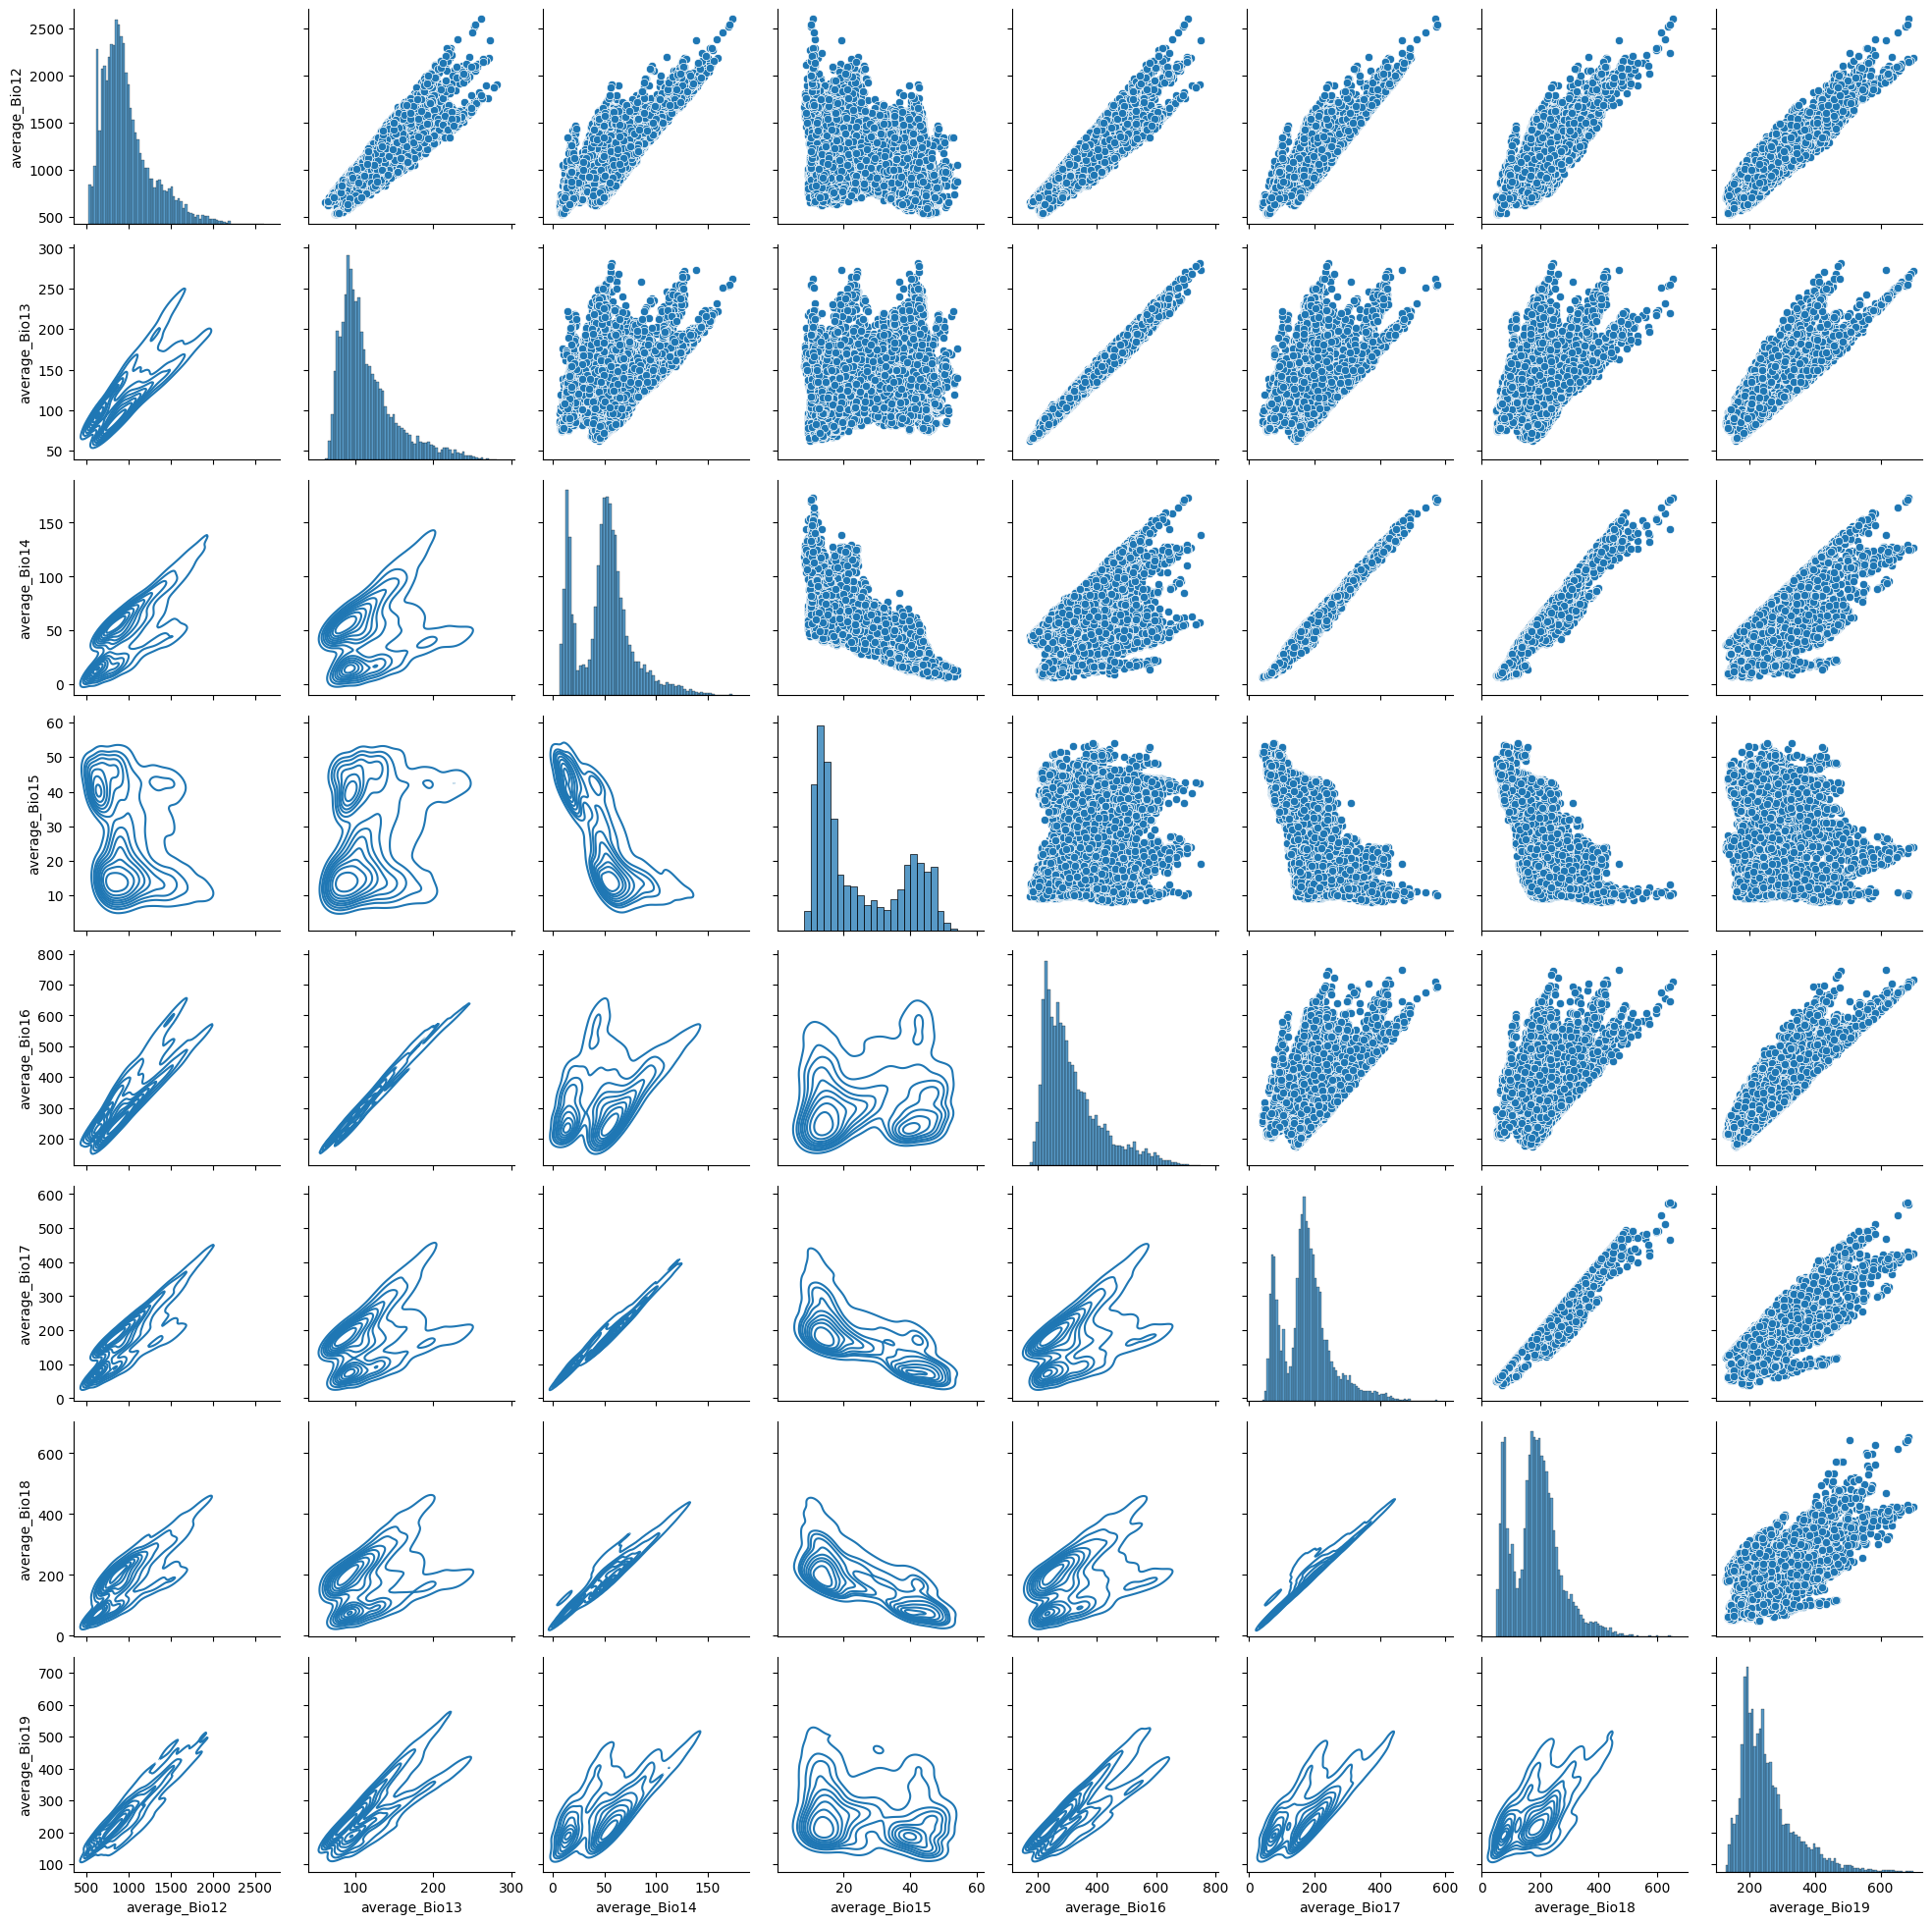

In [41]:
g = sns.PairGrid(Xx[precp_columns], diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

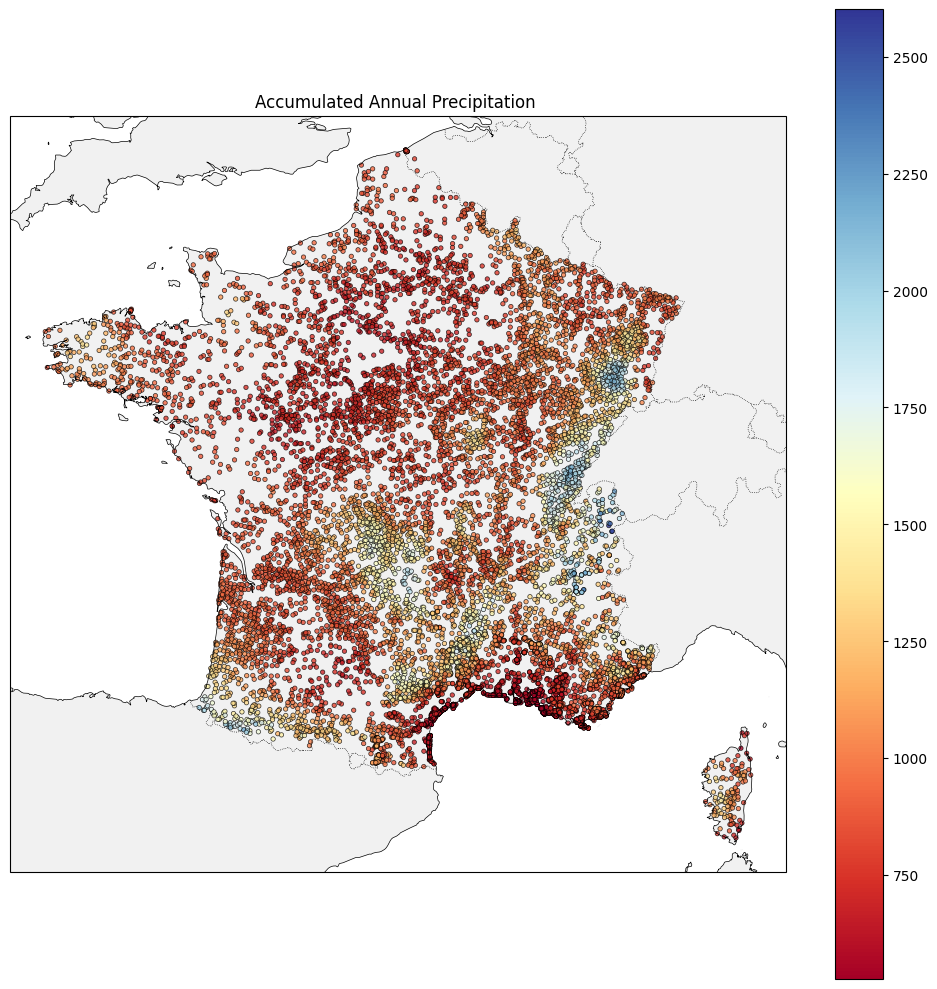

In [59]:
### Plot annual accumulated precipitation over the France region
dff = pd.concat([Xx[precp_columns],
           df.set_index("surveyId")[["lon","lat"]]
           ],
          axis=1
          )
gdf = gpd.GeoDataFrame(dff,
                    geometry = gpd.points_from_xy(dff["lon"],
                                                     dff["lat"]),
                    crs="EPSG:4326"
)
 
fig, ax = plt.subplots(figsize=(10,10),
                       subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5) 
gdf.plot(
    column='average_Bio12',
    cmap='RdYlBu',
    legend=True,
    ax=ax,
    markersize=10,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)

ax.set_title("Accumulated Annual Precipitation ")
plt.tight_layout()

### Correlation of the Precipitation Variables

Text(0.5, 1.0, 'Precipitation Climatic Variables')

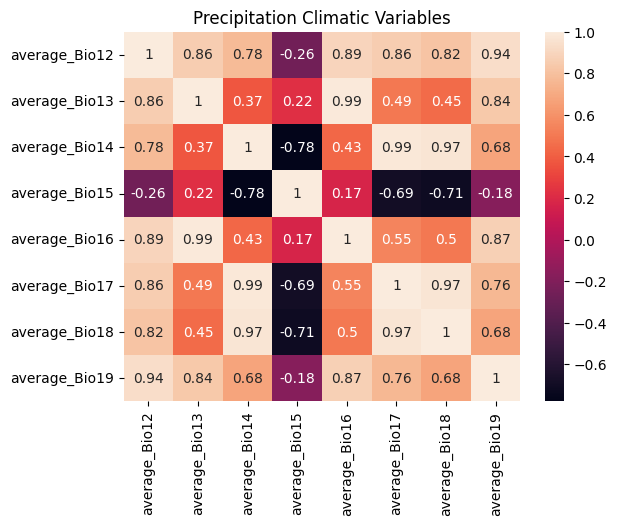

In [65]:
sns.heatmap(Xx[precp_columns].corr(), annot=True)
plt.title("Precipitation Climatic Variables")

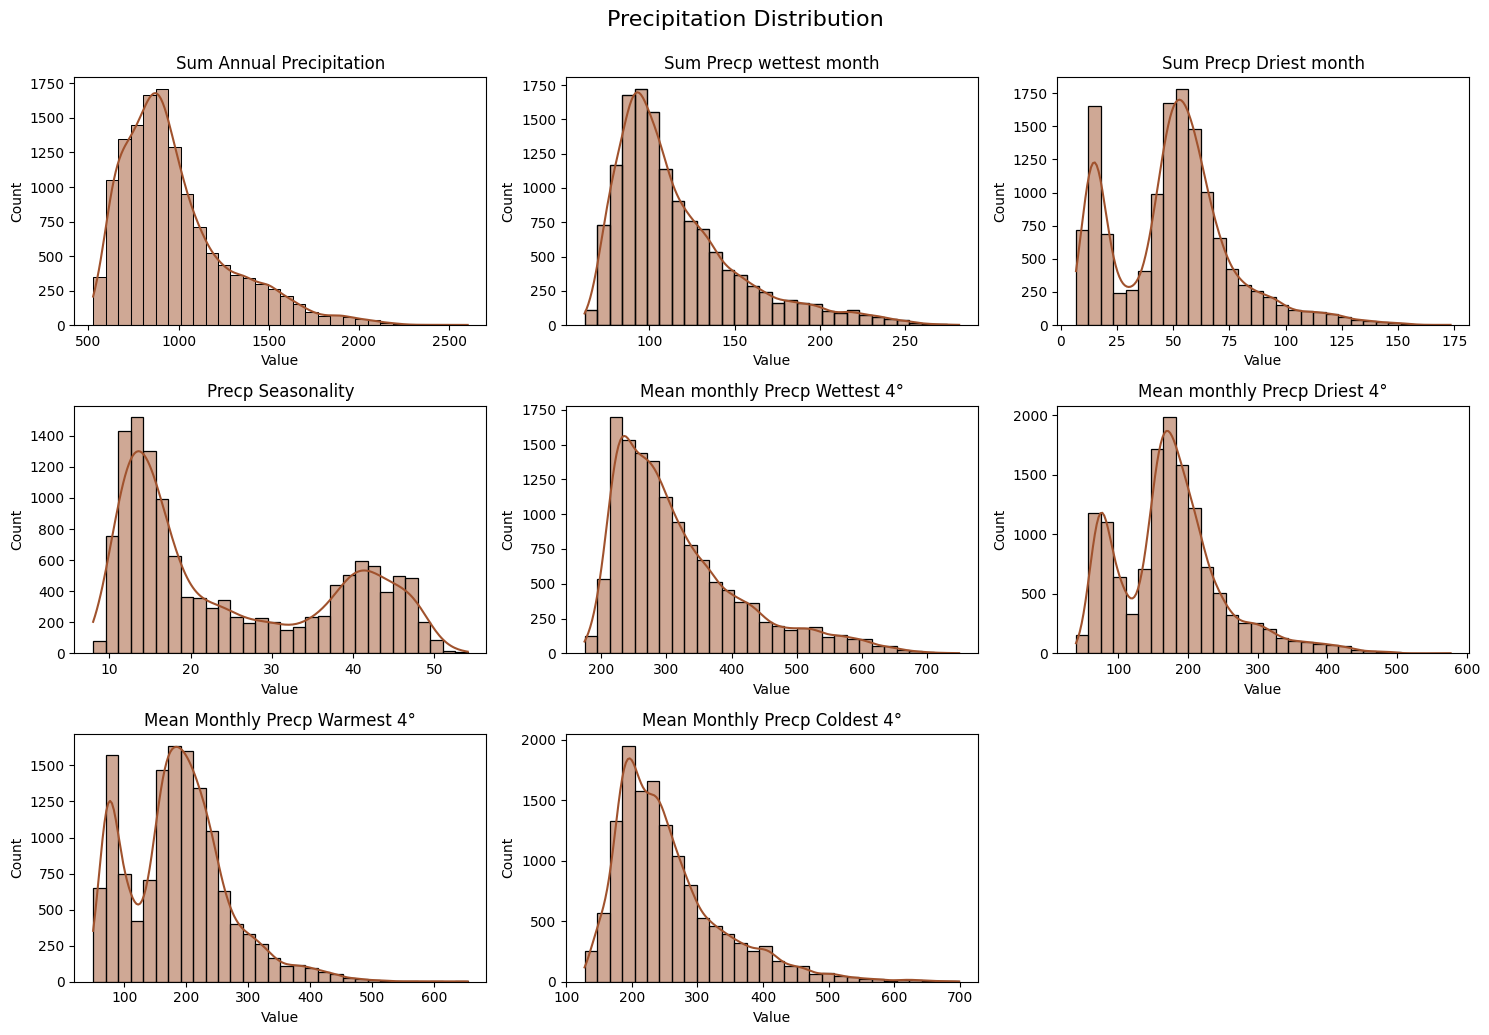

In [79]:
name_columns = ["Sum Annual Precipitation","Sum Precp wettest month", "Sum Precp Driest month",
                "Precp Seasonality","Mean monthly Precp Wettest 4°","Mean monthly Precp Driest 4°","Mean Monthly Precp Warmest 4°","Mean Monthly Precp Coldest 4°"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(Xx[precp_columns],1):  # first 9 soil variables
    plt.subplot(3, 3, i)
    sns.histplot(Xx[col], kde=True, color='sienna', bins=30)
    plt.title(name_columns[i-1])
    plt.xlabel("Value")
    plt.tight_layout()
plt.suptitle("Precipitation Distribution", fontsize=16, y=1.03)
plt.show()

### Temperature Variables

| Code  | Description                                  | Unit   | Notes                                                                                     |
|-------|----------------------------------------------|--------|-------------------------------------------------------------------------------------------|
| bio1  | Mean annual air temperature                   | °C     | Mean annual daily mean air temperatures averaged over 1 year                             |
| bio2  | Mean diurnal air temperature range            | °C     | Mean diurnal range of temperatures averaged over 1 year                                  |
| bio3  | Isothermality                                 | °C     | Ratio of diurnal variation to annual variation in temperatures                           |
| bio4  | Temperature seasonality                       | °C/100 | Standard deviation of the monthly mean temperatures                                      |
| bio5  | Mean daily maximum air temperature of the warmest month | °C     | The highest temperature of any monthly daily mean maximum temperature                    |
| bio6  | Mean daily minimum air temperature of the coldest month | °C     | The lowest temperature of any monthly daily mean minimum temperature                     |
| bio7  | Annual range of air temperature               | °C     | The difference between the maximum temperature of warmest month and minimum temperature of coldest month |
| bio8  | Mean daily mean air temperatures of the wettest quarter | °C     | The wettest quarter of the year is determined (to the nearest month)                     |
| bio9  | Mean daily mean air temperatures of the driest quarter | °C     | The driest quarter of the year is determined (to the nearest month)                      |
| bio10 | Mean daily mean air temperatures of the warmest quarter | °C     | The warmest quarter of the year is determined (to the nearest month)                     |
| bio11 | Mean daily mean air temperatures of the coldest quarter | °C     | The coldest quarter of the year is determined (to the nearest month)                     |


In [70]:
temp_cols = ['average_Bio1', 'average_Bio2', 'average_Bio3', 'average_Bio4',
       'average_Bio5', 'average_Bio6', 'average_Bio7', 'average_Bio8',
       'average_Bio9', 'average_Bio10', 'average_Bio11']

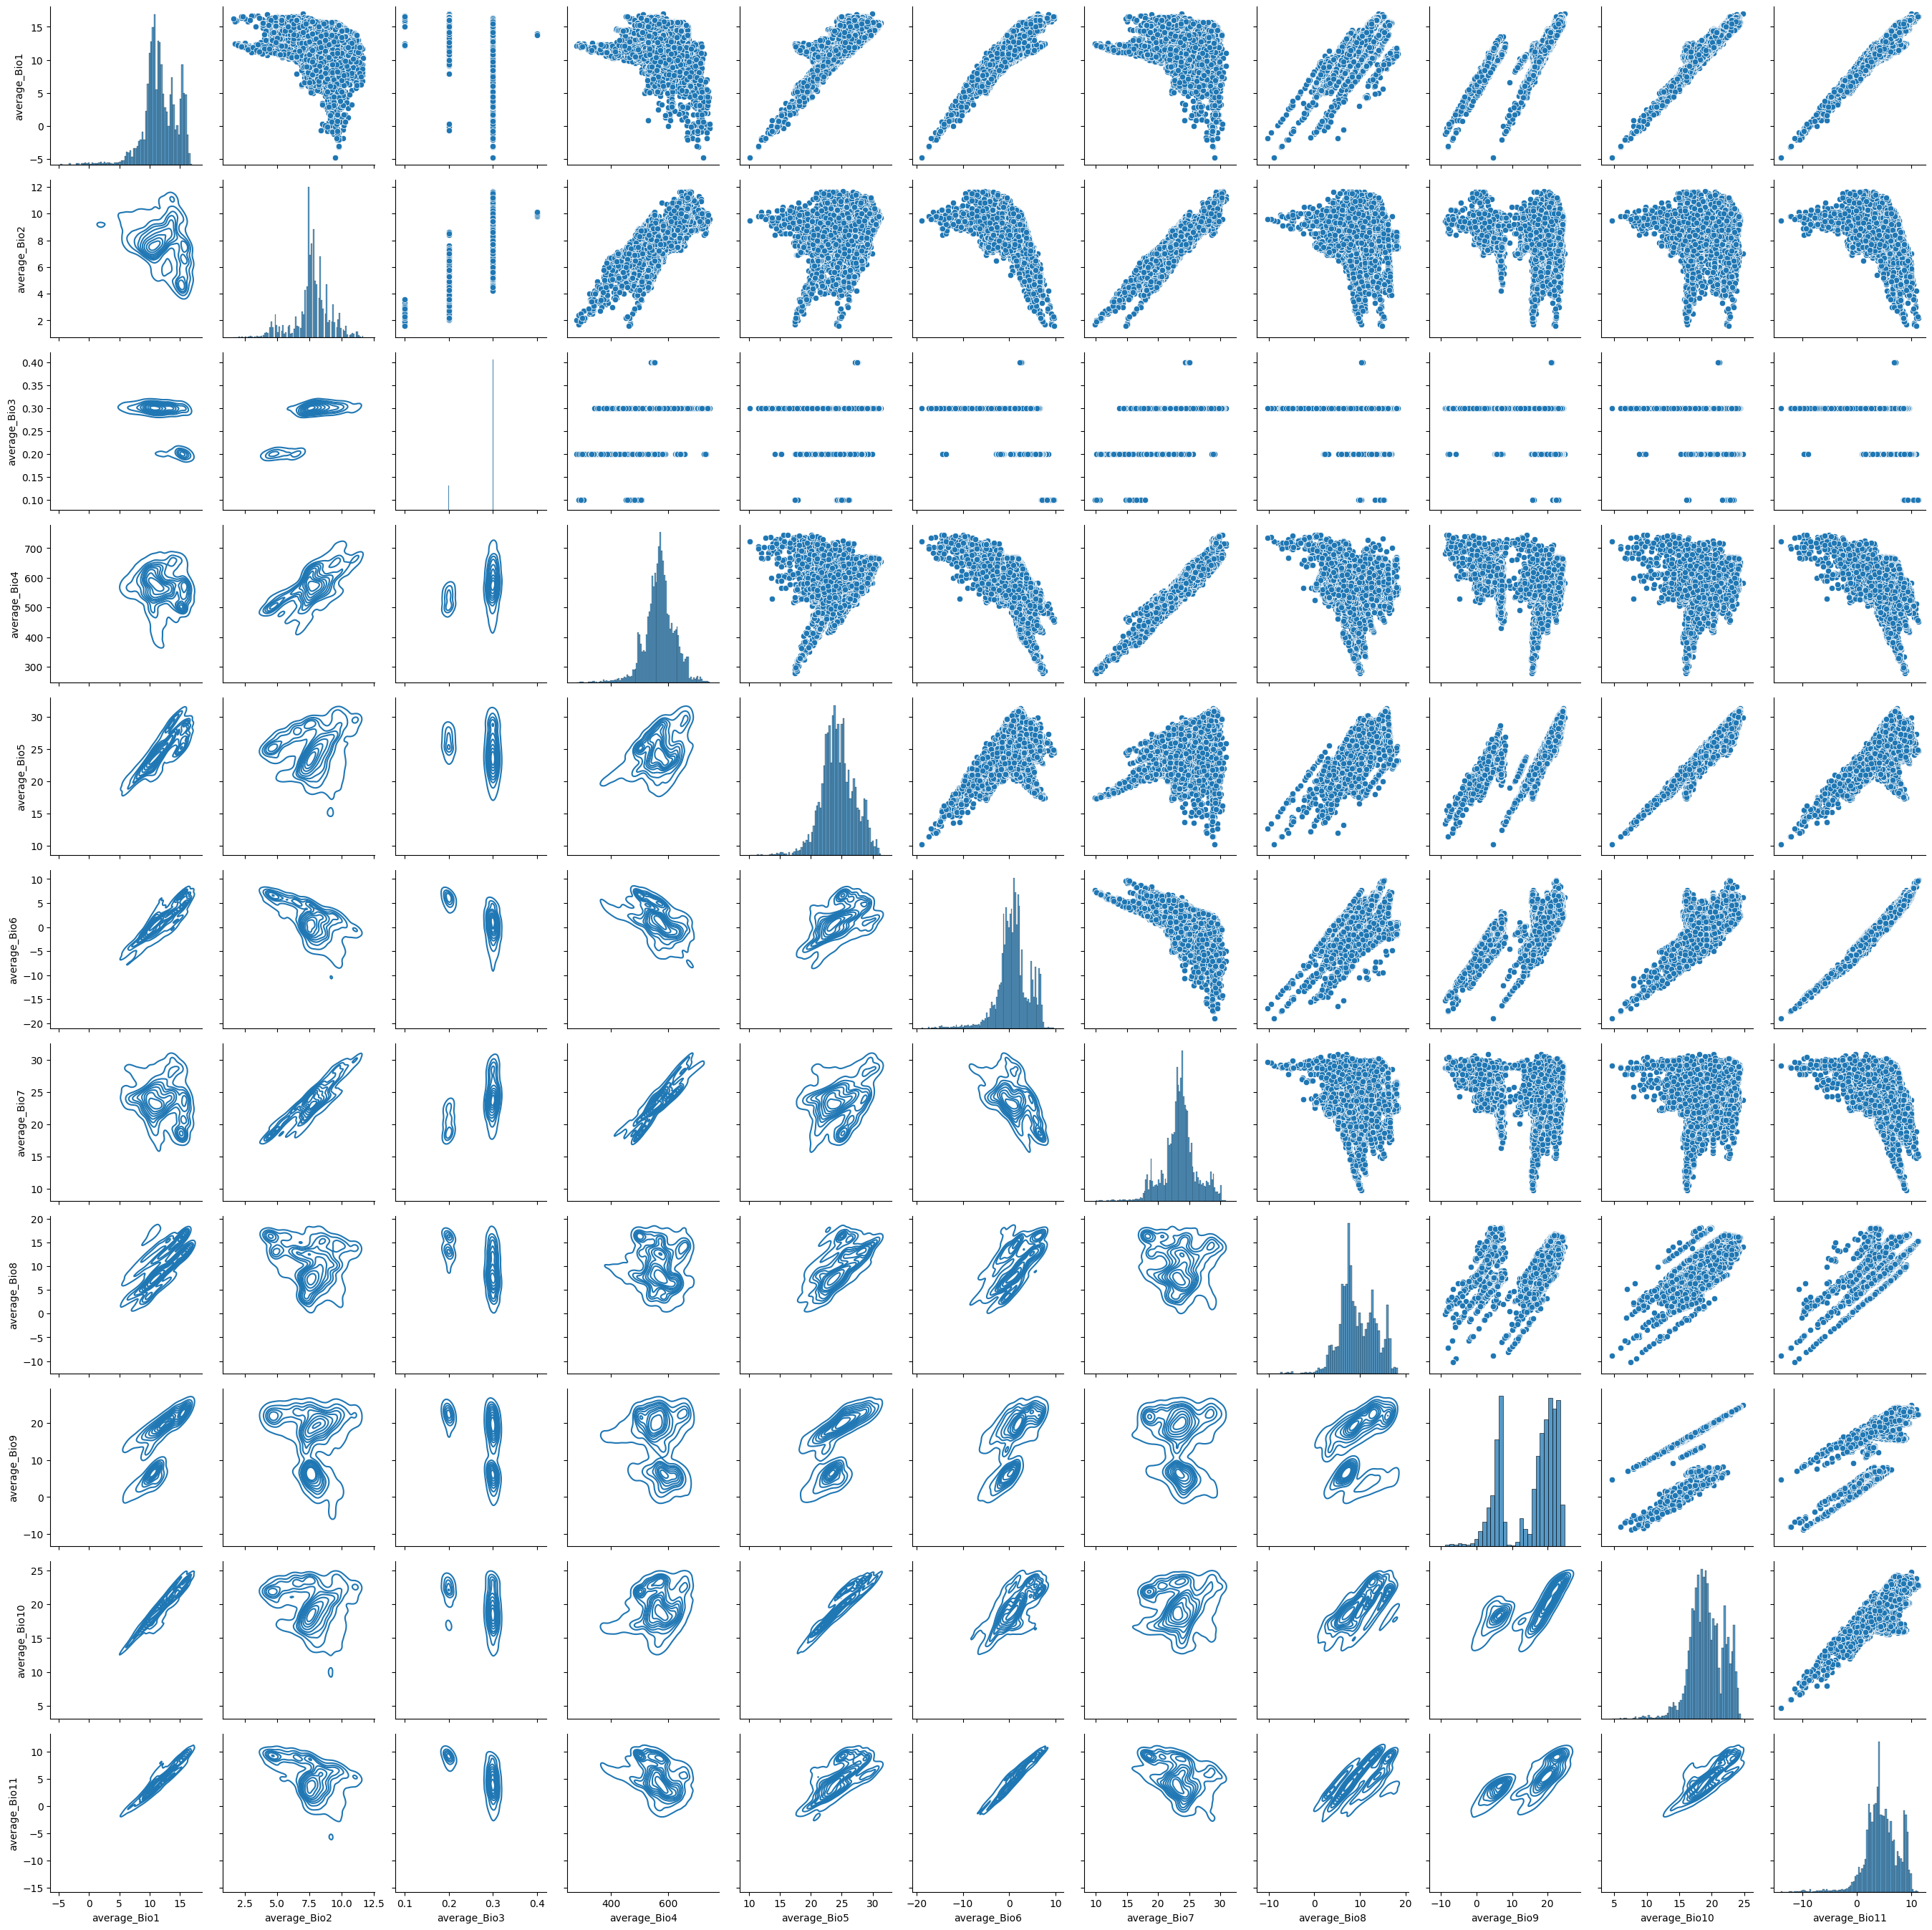

In [71]:
g = sns.PairGrid(Xx[temp_cols], diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

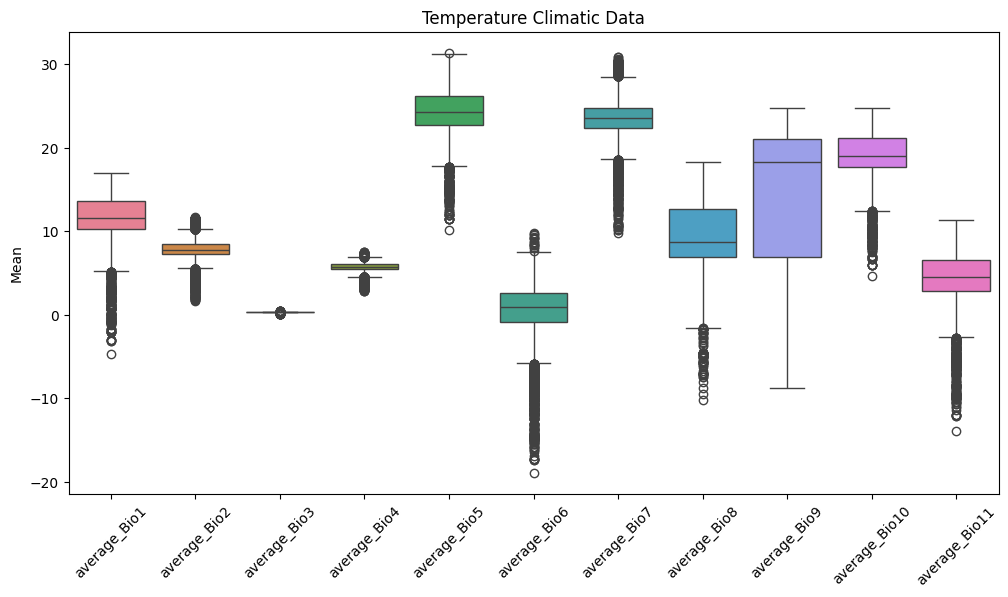

In [ ]:
## Divide per 100
Xx["average_Bio4"] = Xx["average_Bio4"]/100 

plt.figure(figsize=(12,6))
sns.boxplot(data=Xx[temp_cols])
plt.xticks(rotation=45)
plt.title('Temperature Climatic Data')
plt.ylabel('Mean')
plt.show()


In [85]:
Xx[temp_cols].describe()

average_Bio1  average_Bio2  average_Bio3  average_Bio4  average_Bio5  \
count  13501.000000  13501.000000  13501.000000  13501.000000  13501.000000   
mean      11.718499      7.738486      0.285660      5.706511     24.391175   
std        2.683031      1.389297      0.035677      0.537714      2.741278   
min       -4.750000      1.600000      0.100000      2.800000     10.150000   
25%       10.250000      7.300000      0.300000      5.429000     22.750000   
50%       11.550000      7.700000      0.300000      5.717000     24.250000   
75%       13.650000      8.500000      0.300000      6.008000     26.150000   
max       16.950000     11.700000      0.400000      7.454000     31.350000   

       average_Bio6  average_Bio7  average_Bio8  average_Bio9  average_Bio10  \
count  13501.000000  13501.000000  13501.000000  13501.000000   13501.000000   
mean       0.882864     23.508310      9.494834     15.099596      19.265532   
std        3.328988      2.710723      3.892430      7.402924       2.615089   
min      -18.950000      9.800000    -10.250000     -8.750000       4.650000   
25%       -0.850000     22.300000      6.950000      6.850000      17.650000   
50%        0.950000     23.600000      8.750000     18.250000      19.050000   
75%        2.550000     24.800000     12.650000     21.050000      21.150000   
max        9.750000     30.900000     18.250000     24.750000      24.750000   

       average_Bio11  
count   13501.000000  
mean        4.621558  
std         3.009188  
min       -13.950000  
25%         2.850000  
50%         4.450000  
75%         6.550000  
max        11.350000

In [84]:
Xx["average_Bio4"] = Xx["average_Bio4"]/100 

### LandUse